In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df_stories = pd.read_csv('stories.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 
processedData

['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like',
 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly',
 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet act

In [27]:
# for visualization
import pandas as pd
wiki_lst=[]
title=[]
for story_index, data in enumerate(processedData):
    wiki_lst.append(data)
    title.append(story_index)
print("examine content")
wiki_lst

examine content


['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like',
 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly',
 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet act

In [28]:
df_vectors = pd.read_csv('Roberta_sentence_embedding.csv', ',') # change this file name §§§§
df_vectors.drop(df_vectors.columns[0], axis=1,inplace=True)
df_vectors_with_PCA = df_vectors.copy()

df_vectors.head()
df_vectors_with_PCA.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.797835,0.473089,-0.315619,0.220030,-0.571638,-0.324579,1.484851,1.094819,-0.216469,-0.665684,-0.638528,-0.092860,0.183627,0.099210,-0.971626,0.901703,0.549141,0.191285,0.131652,-0.037048,0.008454,-0.608004,1.520178,-0.739302,0.295173,-0.203754,-0.351545,0.090909,-0.949347,-0.411917,0.153617,-0.807413,0.501466,-0.915826,-1.608153,-1.007883,-0.002584,-0.466984,1.431391,-0.455073,...,-0.109188,0.114999,0.968831,-0.332174,-0.585676,1.075228,0.110273,-0.629043,-0.358601,-1.576633,1.100822,-0.518911,0.241859,-0.803177,0.017192,0.029113,-0.614271,-0.663161,-1.005538,0.125170,0.412694,-0.831940,0.150737,-0.350607,-0.130902,0.893440,-0.811417,-0.322942,0.332216,0.435471,-0.453030,-1.133510,-0.662529,2.228812,0.102483,0.779817,-0.034904,-0.204546,-0.644444,1.191204
1,-0.038413,-0.400937,0.457787,-1.270941,1.272729,0.007840,-0.978864,-0.872549,-0.626968,0.566641,-0.763066,0.544732,-0.328572,-1.017029,1.238360,1.246209,-0.222671,0.374209,1.162624,1.712219,0.004672,-0.607216,0.656111,0.336003,-0.767769,0.284495,-0.203042,0.191927,-0.816090,-0.066791,-0.042783,0.152295,1.905045,-2.287549,-0.755109,-1.381831,-0.839903,-1.958124,0.730696,0.623516,...,-0.794575,-0.426771,0.924079,0.305326,-0.522444,0.668490,0.504385,-0.731998,0.628671,-0.233483,1.001769,-2.256289,-0.513874,0.648447,-0.852081,0.179199,-0.304233,-0.364143,-0.515941,1.255011,-0.247313,-0.545175,-0.810545,-2.521533,1.719938,-0.071912,0.253882,0.116157,-0.203430,0.364522,1.314989,-0.852732,0.008422,-0.666257,-0.325702,0.463297,-0.338196,-0.371879,-0.811173,0.180943
2,0.043183,0.215344,0.343407,-0.569217,-0.651456,-0.799914,0.420582,-0.140880,-0.162844,-0.124209,0.187839,0.054282,0.687222,-0.553976,-1.426925,0.908566,0.747715,1.037285,1.087378,0.650515,-0.039145,0.025689,1.394506,-0.447766,0.752661,-0.939980,1.104887,0.157294,-1.176333,-0.833484,-0.373256,-0.307370,0.628536,-1.575513,-1.792388,-0.856948,-0.080995,0.400192,1.142229,-0.494503,...,-0.119367,0.064735,0.349639,-0.101262,-0.849716,0.081614,0.378328,-1.690716,0.152391,-1.237164,-0.068321,-0.576541,-0.237273,0.054389,-0.121587,0.200484,0.509170,-0.649804,-0.757292,0.682622,1.099175,-1.555860,-0.377375,-1.274306,0.461264,0.711322,-0.130316,-0.638154,-0.602772,0.184496,0.107832,-1.232758,0.601333,0.085673,0.728788,0.844707,-0.164399,0.096442,-1.189582,-0.207432
3,0.073729,1.201427,-0.435990,-0.882148,-0.858508,0.642715,-0.585034,-0.160980,0.496018,0.483121,-0.343759,-0.255319,-0.640419,-0.034740,-0.678554,1.120627,0.806607,1.867075,1.554896,0.182364,0.134400,1.881469,2.359531,0.350548,0.141464,-0.282142,0.181177,0.712998,-0.258387,-0.207626,-0.498276,-0.564936,0.541524,-1.450747,-2.083061,-1.062181,-1.022995,0.110954,0.542248,-0.127745,...,-0.805904,-0.479664,0.715512,0.482938,-0.922742,0.461081,-0.607745,-1.275613,1.472782,-0.613876,0.514363,-0.247800,-0.299209,-0.127285,-0.701566,0.767403,-0.078779,-1.630759,-1.208992,0.426379,0.039133,-0.047365,-0.558741,-1.793261,-0.641342,1.040909,-0.074070,-1.146715,0.224982,-0.366501,0.690137,-2.229799,0.614177,1.068442,-0.352036,0.952395,0.270812,0.092025,-0.877255,-0.093565
4,0.681180,0.389447,-0.624375,0.429121,0.048745,0.031417,0.553299,1.462671,0.483015,-0.381789,0.170728,-0.084853,0.051768,-1.018667,-1.910726,0.351488,0.300973,1.064672,0.071559,1.154845,0.211654,-0.282826,1.425306,0.618831,0.078977,-0.731048,0.033188,0.536464,-0.875104,0.066464,0.750319,-0.130428,1.357401,-1.107493,-0.434814,-0.548841,0.249050,-0.239984,0.660852,-0.553139,...,1.495394,-1.180118,1.510518,-0.112893,-1.466044,0.221820,0.260191,-0.823175,-0.224742,-0.923890,1.157082,-1.091849,-0.800686,-0.725713,-0.476229,1.398711,-0.566412,-1.776355,-1.414657,-0.279381,0.532022,-0.340368,-0.498958,-1.536948,0.970191,

##Without PCA

In [29]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_vectors)
data_scaled = pd.DataFrame(data_scaled, columns= df_vectors.columns)
data_scaled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.027944,0.016570,-0.011055,0.007707,-0.020022,-0.011369,0.052007,0.038346,-0.007582,-0.023316,-0.022365,-0.003252,0.006432,0.003475,-0.034032,0.031582,0.019234,0.006700,0.004611,-0.001298,0.000296,-0.021296,0.053245,-0.025894,0.010339,-0.007137,-0.012313,0.003184,-0.033251,-0.014428,0.005380,-0.028280,0.017564,-0.032077,-0.056326,-0.035301,-0.000091,-0.016356,0.050135,-0.015939,...,-0.003824,0.004028,0.033934,-0.011635,-0.020514,0.037660,0.003862,-0.022032,-0.012560,-0.055222,0.038557,-0.018175,0.008471,-0.028132,0.000602,0.001020,-0.021515,-0.023227,-0.035219,0.004384,0.014455,-0.029139,0.005280,-0.012280,-0.004585,0.031293,-0.028420,-0.011311,0.011636,0.015253,-0.015868,-0.039702,-0.023205,0.078065,0.003590,0.027313,-0.001223,-0.007164,-0.022572,0.041722
1,-0.001297,-0.013532,0.015451,-0.042897,0.042957,0.000265,-0.033039,-0.029450,-0.021161,0.019125,-0.025755,0.018386,-0.011090,-0.034327,0.041797,0.042062,-0.007516,0.012630,0.039241,0.057791,0.000158,-0.020495,0.022145,0.011341,-0.025914,0.009602,-0.006853,0.006478,-0.027545,-0.002254,-0.001444,0.005140,0.064299,-0.077210,-0.025487,-0.046640,-0.028348,-0.066091,0.024663,0.021045,...,-0.026819,-0.014404,0.031190,0.010305,-0.017634,0.022563,0.017024,-0.024706,0.021219,-0.007881,0.033812,-0.076154,-0.017344,0.021886,-0.028760,0.006048,-0.010269,-0.012291,-0.017414,0.042359,-0.008347,-0.018401,-0.027358,-0.085107,0.058052,-0.002427,0.008569,0.003921,-0.006866,0.012303,0.044384,-0.028781,0.000284,-0.022488,-0.010993,0.015637,-0.011415,-0.012552,-0.027379,0.006107
2,0.001473,0.007347,0.011717,-0.019421,-0.022227,-0.027292,0.014350,-0.004807,-0.005556,-0.004238,0.006409,0.001852,0.023447,-0.018901,-0.048685,0.030999,0.025511,0.035391,0.037100,0.022195,-0.001336,0.000876,0.047579,-0.015277,0.025680,-0.032071,0.037697,0.005367,-0.040135,-0.028437,-0.012735,-0.010487,0.021445,-0.053755,-0.061154,-0.029238,-0.002763,0.013654,0.038971,-0.016872,...,-0.004073,0.002209,0.011929,-0.003455,-0.028991,0.002785,0.012908,-0.057685,0.005199,-0.042210,-0.002331,-0.019671,-0.008095,0.001856,-0.004148,0.006840,0.017372,-0.022170,-0.025838,0.023290,0.037502,-0.053084,-0.012876,-0.043478,0.015738,0.024269,-0.004446,-0.021773,-0.020566,0.006295,0.003679,-0.042060,0.020517,0.002923,0.024865,0.028820,-0.005609,0.003290,-0.040587,-0.007077
3,0.002549,0.041537,-0.015073,-0.030498,-0.029681,0.022220,-0.020226,-0.005566,0.017149,0.016703,-0.011885,-0.008827,-0.022141,-0.001201,-0.023459,0.038743,0.027887,0.064550,0.053757,0.006305,0.004647,0.065047,0.081575,0.012119,0.004891,-0.009754,0.006264,0.024650,-0.008933,-0.007178,-0.017227,-0.019531,0.018722,-0.050156,-0.072017,-0.036722,-0.035368,0.003836,0.018747,-0.004416,...,-0.027862,-0.016583,0.024737,0.016696,-0.031902,0.015941,-0.021011,-0.044101,0.050918,-0.021223,0.017783,-0.008567,-0.010344,-0.004401,-0.024255,0.026531,-0.002724,-0.056380,-0.041798,0.014741,0.001353,-0.001638,-0.019317,-0.061998,-0.022173,0.035987,-0.002561,-0.039645,0.007778,-0.012671,0.023860,-0.077090,0.021234,0.036939,-0.012171,0.032927,0.009363,0.003182,-0.030329,-0.003235
4,0.023051,0.013179,-0.021129,0.014522,0.001650,0.001063,0.018724,0.049497,0.016345,-0.012920,0.005777,-0.002871,0.001752,-0.034472,-0.064660,0.011894,0.010185,0.036029,0.002422,0.039080,0.007162,-0.009571,0.048233,0.020941,0.002673,-0.024739,0.001123,0.018154,-0.029614,0.002249,0.025391,-0.004414,0.045935,-0.037478,-0.014714,-0.018573,0.008428,-0.008121,0.022363,-0.018718,...,0.050605,-0.039936,0.051116,-0.003820,-0.049611,0.007506,0.008805,-0.027856,-0.007605,-0.031265,0.039156,-0.036948,-0.027095,-0.024558,-0.016116,0.047333,-0.019168,-0.060112,-0.047872,-0.009454,0.018004,-0.011518,-0.016885,-0.052011,0.032832,

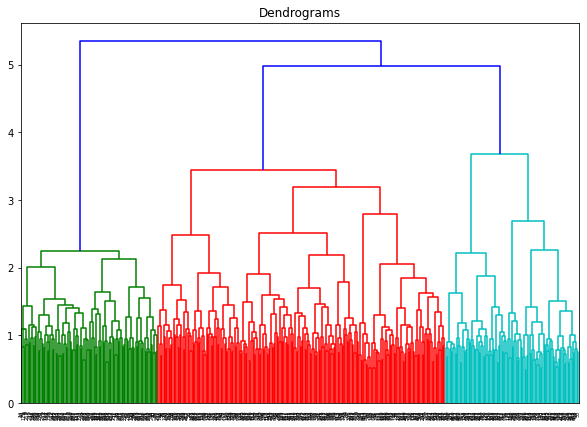

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [31]:
#TRYING Three CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


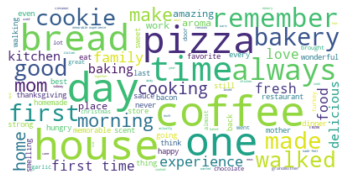

Cluster: 1
Titles


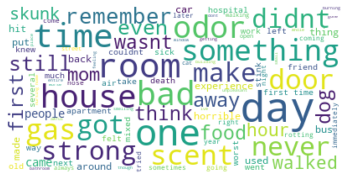

Cluster: 2
Titles


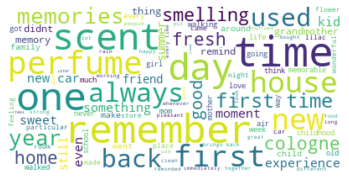

In [32]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,3):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "smells" and word != "really"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [33]:
labels
import csv
with open('Roberta_HCA_clusters_3_withoutPCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

##WIth PCA

103


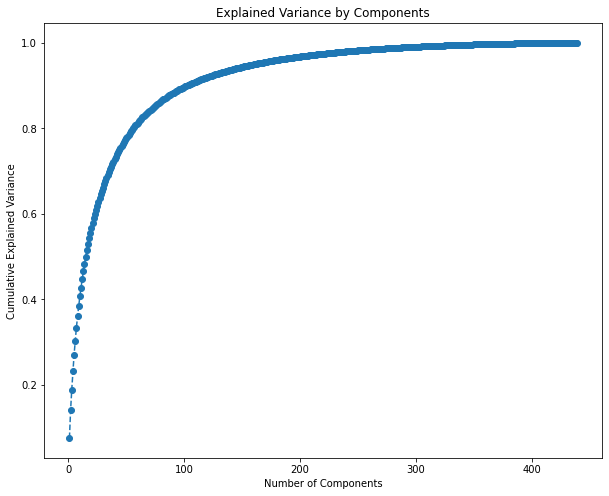

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_vectors_with_PCA)

pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,440), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title('Explained Variance by Components') 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance') 

noComponents = 0 # 0.9 is our baseline
for element in np.cumsum(pca.explained_variance_ratio_):
  noComponents = noComponents + 1
  if element >= 0.9:
    break
print(noComponents)

In [35]:
pca = PCA(n_components=noComponents)

pca.fit(segmentation_std)

pca.transform(segmentation_std)

scores_pca = pca.transform(segmentation_std)

print(segmentation_std.shape)

(439, 1023)


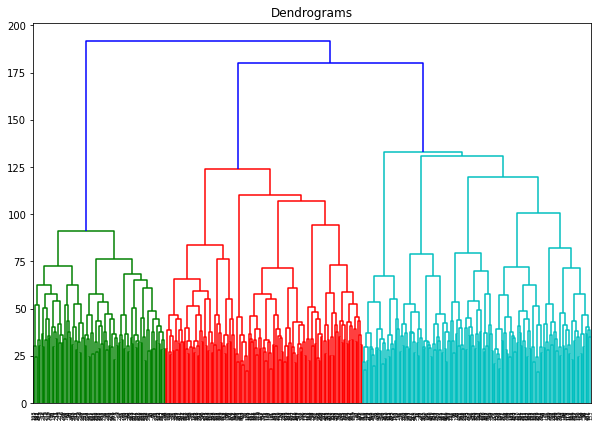

In [36]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scores_pca, method='ward'))

In [37]:
#TRYING Four CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(scores_pca)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


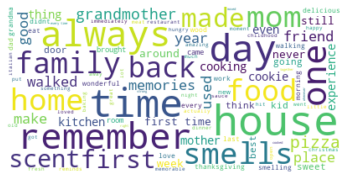

Cluster: 1
Titles


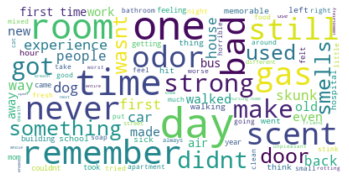

Cluster: 2
Titles


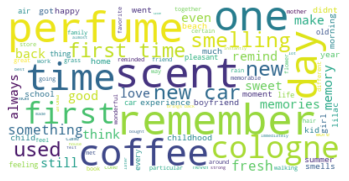

Cluster: 3
Titles


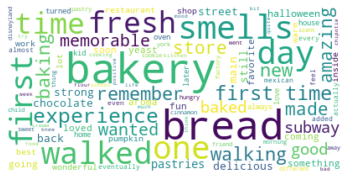

In [38]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "really"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    name = "roberta_PCA" + str(k) + ".png"
    plt.savefig(name)
    plt.show()


In [39]:
labels
import csv
with open('clusters_4_with_PCA_Roberta_HCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

# Evaluation


In [40]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [41]:
labels_withoutPCA = cluster.fit_predict(data_scaled)
labels_withPCA = cluster.fit_predict(scores_pca)

##Silhouette Coefficient

### Without PCA

In [42]:
silhouette_vals = silhouette_samples(data_scaled, labels_withoutPCA)
silhouette_vals

array([ 0.06640067,  0.11464663,  0.09671878,  0.10032717, -0.07981825,
        0.07305341,  0.01512881,  0.05421785,  0.09830615,  0.04132806,
        0.03874577,  0.01850195,  0.08867054, -0.00755545, -0.01564719,
       -0.03115055,  0.06618781,  0.06449451,  0.00029198, -0.00498786,
        0.12248529,  0.05342182,  0.04173526, -0.07753615,  0.08771039,
       -0.00304811,  0.01762037,  0.15620544,  0.14623459,  0.06920335,
        0.09443469,  0.11333748,  0.09013965,  0.16288632,  0.1395745 ,
        0.12005739,  0.03334022,  0.09434589,  0.11194129, -0.07480566,
        0.0801163 ,  0.11213824,  0.04687795, -0.00997894,  0.01407387,
        0.16005137, -0.00038712,  0.047824  , -0.08691389,  0.0135982 ,
       -0.02989602, -0.00346568,  0.04523905,  0.12392405,  0.07663421,
        0.02585888,  0.06528146,  0.00104482,  0.11690579,  0.00689231,
        0.0439673 ,  0.04932789,  0.06161585,  0.11434262,  0.06266438,
        0.04951429,  0.15019429,  0.10358336,  0.02356631,  0.02

### With PCA

In [43]:
silhouette_vals = silhouette_samples(scores_pca, labels_withPCA)
silhouette_vals

array([ 6.05284057e-02,  9.93719646e-02,  1.18190289e-01,  1.01819661e-01,
        8.33154578e-02,  6.39330009e-02,  2.77399708e-02,  5.66079943e-02,
        1.07925411e-01,  3.76717094e-02,  5.80685603e-02, -6.62799902e-02,
        1.00766588e-01, -1.02935706e-02, -3.37206370e-02,  2.75990300e-02,
        6.47248156e-02,  6.05227298e-02, -3.52494401e-02, -2.17103491e-02,
        1.06322742e-01,  4.45827841e-02,  1.09329837e-01,  7.12999505e-02,
        2.16196919e-01,  3.85331601e-03, -6.45097924e-03, -2.09261256e-02,
        2.43220533e-01, -8.99884456e-02,  1.66145008e-01,  3.83775013e-02,
       -2.39292633e-02, -1.75563244e-01,  1.35193928e-01,  1.19355780e-01,
        5.66712340e-03,  1.03305751e-01,  9.39596592e-02,  1.39660090e-02,
        6.08919183e-02,  1.23243804e-01, -5.40221990e-02,  2.48909001e-02,
        9.17292962e-03, -1.22564170e-01, -4.41790726e-03,  4.79164983e-02,
       -5.07648288e-03,  9.40336897e-03,  3.40343619e-02,  3.73768522e-02,
        8.46790123e-02, -

##Calinski-Harabasz Index

### Without PCA

In [44]:
calinski_harabasz_val = calinski_harabasz_score(data_scaled, labels_withoutPCA)
calinski_harabasz_val

19.70041995610716

### With PCA

In [45]:
calinski_harabasz_val = calinski_harabasz_score(scores_pca, labels_withPCA)
calinski_harabasz_val

17.475314333538353

##Davies-Bouldin Index

### Without PCA

In [46]:
davies_bouldin_val = davies_bouldin_score(data_scaled, labels_withoutPCA)
davies_bouldin_val

3.2665914941293814

### With PCA

In [47]:
davies_bouldin_val = davies_bouldin_score(scores_pca, labels_withPCA)
davies_bouldin_val

3.5999332655941436

[1 1 1 1 1 1 1 2 1 2 2 0 1 1 1 1 1 2 0 0 1 2 0 0 0 2 0 0 0 2 0 0 0 0 1 1 1
 2 1 0 1 1 0 1 0 0 0 1 0 2 0 2 0 0 1 1 1 2 1 0 0 2 1 1 1 2 2 2 1 0 0 2 2 2
 0 0 0 0 1 2 2 2 2 2 2 1 2 2 0 0 0 0 0 2 1 2 0 1 2 2 0 2 0 2 2 2 0 2 2 1 2
 0 2 2 0 0 2 0 0 0 2 2 2 0 2 2 0 2 2 0 1 1 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1
 2 2 0 2 0 2 0 1 0 2 0 1 1 1 2 1 0 1 0 2 2 2 0 2 0 2 0 0 1 0 0 0 0 2 2 0 2
 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 2 1 1 1 1 0 1 0 2 0 1 1 0 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 2 2 0 1 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2
 0 2 2 0 1 2 0 0 2 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0
 2 0 0 0 0 0 2 0 2 0 0 0 0 1 2 2 2 0 2 2 2 2 2 1 0 2 0 0 0 0 0 2 2 2 2 2 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 1 2 2 1 2 2]
0.04601436384157777


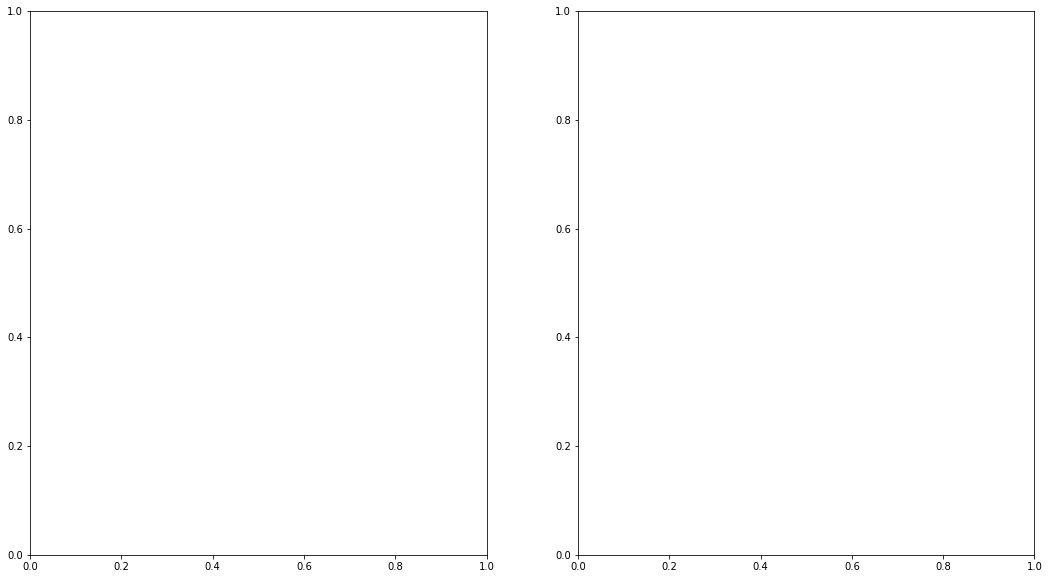

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_coefficients = []

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 10)

km = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = km.fit_predict(scores_pca)
# centroids = km.cluster_centers_
print(labels)

# Get silhouette samples
silhouette_vals = silhouette_samples(scores_pca, labels)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
print(avg_score)
# ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
# ax1.set_yticks([])
# ax1.set_xlim([-0.1, 1])
# ax1.set_xlabel('Silhouette coefficient values')
# ax1.set_ylabel('Cluster labels')
# ax1.set_title('Silhouette plot for the various clusters', y=1.02);
# print(avg_score)  
# # Scatter plot of data colored with labels
# ax2.scatter(scores_pca[:, 0], scores_pca[:, 1], c=labels)
# ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
# ax2.set_xlim([-2, 2])
# ax2.set_xlim([-2, 2])
# ax2.set_xlabel('Eruption time in mins')
# ax2.set_ylabel('Waiting time to next eruption')
# ax2.set_title('Visualization of clustered data', y=1.02)
# ax2.set_aspect('equal')
# plt.tight_layout()
# plt.suptitle(f'Silhouette analysis using k = {noOfClusters}',
#                   fontsize=16, fontweight='semibold', y=1.05);